# DATA LOADING

In [1]:
# importing the libraries required

import numpy as np
import pandas as pd

In [2]:
# reading the dataset

df = pd.read_csv("trees_dataset.csv")

In [3]:
# printing the data set

df

,OBJECTID,Tree ID,Tree Type,Genus,Species,Cultivar or Varietal,Common Name,Canopy Spread,Height,Latitude,Longitude
0,1,10146,DECIDUOUS,Quercus,bicolor,NaN,Swamp White Oak,19.0,21.0,40.009104,-105.272529
1,2,10150,DECIDUOUS,Gymnocladus,dioicus,NaN,Kentucky Coffeetree,31.0,47.0,40.009136,-105.272797
2,3,10041,DECIDUOUS,Quercus,rubra,NaN,Northern Red Oak,65.0,102.0,40.008888,-105.274886
3,4,10042,DECIDUOUS,Quercus,rubra,NaN,Northern Red Oak,42.0,54.0,40.008775,-105.275000
4,5,10051,DECIDUOUS,Crataegus,NaN,NaN,Hawthorne,18.0,20.0,40.008870,-105.275428
...,...,...,...,...,...,...,...,...,...,...,...
772,773,13830,DECIDUOUS,Taxodium,NaN,NaN,Bald Cypress,15.0,25.0,40.010252,-105.273964
773,774,13833,DECIDUOUS,Crataegus,NaN,NaN,Hawthorne,15.0,20.0,40.010316,-105.274258
774,775,14027,DECIDUOUS,Catalpa,speciosa,NaN,Western Catalpa,5.0,10.0,40.008315,-105.272798
775,776,15693,DECIDUOUS,Acer,saccharum,Caddo,NaN,NaN,NaN,40.009700,-105.274889


# DATA CLEANING

In [4]:
# Checking for null values in all columns

df.isnull().sum()

OBJECTID                  0
Tree ID                   0
Tree Type                 0
Genus                     0
Species                 196
Cultivar or Varietal    770
Common Name               1
Canopy Spread             4
Height                    1
Latitude                  0
Longitude                 0
dtype: int64

In [5]:
# Replacing missing species with unknown.

df['Species'] = df['Species'].fillna('Unknown')

In [6]:
df

,OBJECTID,Tree ID,Tree Type,Genus,Species,Cultivar or Varietal,Common Name,Canopy Spread,Height,Latitude,Longitude
0,1,10146,DECIDUOUS,Quercus,bicolor,NaN,Swamp White Oak,19.0,21.0,40.009104,-105.272529
1,2,10150,DECIDUOUS,Gymnocladus,dioicus,NaN,Kentucky Coffeetree,31.0,47.0,40.009136,-105.272797
2,3,10041,DECIDUOUS,Quercus,rubra,NaN,Northern Red Oak,65.0,102.0,40.008888,-105.274886
3,4,10042,DECIDUOUS,Quercus,rubra,NaN,Northern Red Oak,42.0,54.0,40.008775,-105.275000
4,5,10051,DECIDUOUS,Crataegus,Unknown,NaN,Hawthorne,18.0,20.0,40.008870,-105.275428
...,...,...,...,...,...,...,...,...,...,...,...
772,773,13830,DECIDUOUS,Taxodium,Unknown,NaN,Bald Cypress,15.0,25.0,40.010252,-105.273964
773,774,13833,DECIDUOUS,Crataegus,Unknown,NaN,Hawthorne,15.0,20.0,40.010316,-105.274258
774,775,14027,DECIDUOUS,Catalpa,speciosa,NaN,Western Catalpa,5.0,10.0,40.008315,-105.272798
775,776,15693,DECIDUOUS,Acer,saccharum,Caddo,NaN,NaN,NaN,40.009700,-105.274889


In [7]:
# checking again

df.isnull().sum()

OBJECTID                  0
Tree ID                   0
Tree Type                 0
Genus                     0
Species                   0
Cultivar or Varietal    770
Common Name               1
Canopy Spread             4
Height                    1
Latitude                  0
Longitude                 0
dtype: int64

In [8]:
# Dropping the column "Cultivar or Varietal" since ih has more than 97% of missing values.

df = df.drop('Cultivar or Varietal', axis = 1)

In [9]:
# checking again

df.isnull().sum()

OBJECTID         0
Tree ID          0
Tree Type        0
Genus            0
Species          0
Common Name      1
Canopy Spread    4
Height           1
Latitude         0
Longitude        0
dtype: int64

In [10]:
# Checking the missing values of canopy spread

df[df['Tree Type'] == 'DECIDUOUS']['Canopy Spread'].to_frame().isnull().sum()

Canopy Spread    4
dtype: int64

In [11]:
# Checking statistics of Canopy Spread to decide which one to use between mean and median

df['Canopy Spread'].describe()

count    773.000000
mean      19.345408
std       10.950121
min        3.000000
25%       12.000000
50%       16.000000
75%       25.000000
max       65.000000
Name: Canopy Spread, dtype: float64

In [12]:
# calculating median for canopy spread since the mean and 50% values are not equal and there are certain outliers

canopy_median = df[df['Tree Type'] == 'DECIDUOUS']['Canopy Spread'].median()

In [13]:
# replacing canopy spread with median since mean is prone to outliers (It can be seen from describe() the column stats)

df['Canopy Spread'] = df['Canopy Spread'].fillna(canopy_median)

In [14]:
# Now handling the missing values in height column

df[df['Height'].isnull()]

,OBJECTID,Tree ID,Tree Type,Genus,Species,Common Name,Canopy Spread,Height,Latitude,Longitude
775,776,15693,DECIDUOUS,Acer,saccharum,NaN,18.0,NaN,40.0097,-105.274889


In [15]:
# Checking statistics of Height to decide which one to use between mean and median

df['Height'].describe()

count    776.000000
mean      34.748711
std       18.928729
min        0.000000
25%       20.000000
50%       35.000000
75%       47.000000
max      102.000000
Name: Height, dtype: float64

In [16]:
# We can use mean here as there are no outliers. 

# But since there are different spicies of trees with various genes we can either 
# calculate mean value for that particular category or replace with median value of that particular category.

# Since the missing value is from DECIDUOUS category replacing with median height of that particular category

deciduos_median_height = df[df['Tree Type'] == 'DECIDUOUS']['Height'].median() 

In [17]:
deciduos_median_height

30.0

In [18]:
# Replacing value

df['Height'].fillna(deciduos_median_height, inplace = True)

In [35]:
# Handling missing value for common name

df['Common Name'].fillna('Unknown',inplace = True)

In [36]:
# Finally all missing values are imputed and there are no missing values.

df.isnull().sum()

OBJECTID         0
Tree ID          0
Tree Type        0
Genus            0
Species          0
Common Name      0
Canopy Spread    0
Height           0
Latitude         0
Longitude        0
dtype: int64

In [37]:
# Final Cleaned Data Frame

df

,OBJECTID,Tree ID,Tree Type,Genus,Species,Common Name,Canopy Spread,Height,Latitude,Longitude
0,1,10146,DECIDUOUS,Quercus,bicolor,Swamp White Oak,19.0,21.0,40.009104,-105.272529
1,2,10150,DECIDUOUS,Gymnocladus,dioicus,Kentucky Coffeetree,31.0,47.0,40.009136,-105.272797
2,3,10041,DECIDUOUS,Quercus,rubra,Northern Red Oak,65.0,102.0,40.008888,-105.274886
3,4,10042,DECIDUOUS,Quercus,rubra,Northern Red Oak,42.0,54.0,40.008775,-105.275000
4,5,10051,DECIDUOUS,Crataegus,Unknown,Hawthorne,18.0,20.0,40.008870,-105.275428
...,...,...,...,...,...,...,...,...,...,...
772,773,13830,DECIDUOUS,Taxodium,Unknown,Bald Cypress,15.0,25.0,40.010252,-105.273964
773,774,13833,DECIDUOUS,Crataegus,Unknown,Hawthorne,15.0,20.0,40.010316,-105.274258
774,775,14027,DECIDUOUS,Catalpa,speciosa,Western Catalpa,5.0,10.0,40.008315,-105.272798
775,776,15693,DECIDUOUS,Acer,saccharum,Unknown,18.0,30.0,40.009700,-105.274889


# DATA STATS AND OUTLIER DETECTION

In [19]:
# checking stats for 'Height column'

df['Height'].describe()

count    777.000000
mean      34.742600
std       18.917296
min        0.000000
25%       20.000000
50%       35.000000
75%       47.000000
max      102.000000
Name: Height, dtype: float64

The height of a tree can't be zero. We have to deal with the rows which have **height = 0** as their value.

In [20]:
# importing matplotlib

import matplotlib.pyplot as plt

<Axes: >

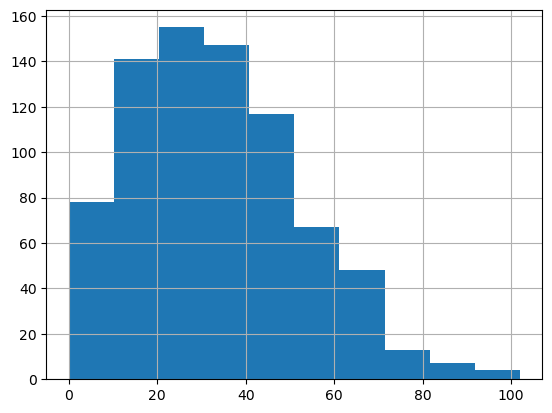

In [21]:
# Visualising 'height'

df['Height'].hist()

### HANDLING ROWS WITH HEIGHT = 0

In [22]:
# checking for rows with height as 0

df[df['Height'] == 0]

,OBJECTID,Tree ID,Tree Type,Genus,Species,Common Name,Canopy Spread,Height,Latitude,Longitude
92,93,13798,DECIDUOUS,Fraxinus,Unknown,Ash,12.0,0.0,40.010068,-105.273288
174,175,13799,DECIDUOUS,Fraxinus,Unknown,Ash,12.0,0.0,40.010080,-105.273284
175,176,13808,DECIDUOUS,Fraxinus,Unknown,Ash,12.0,0.0,40.009974,-105.273221
213,214,14138,DECIDUOUS,Hydrangea,paniculata,Panicle hydrangea,6.0,0.0,40.010040,-105.275953
265,266,13811,DECIDUOUS,Fraxinus,Unknown,Ash,12.0,0.0,40.009915,-105.273204
476,477,13797,DECIDUOUS,Pinus,Unknown,Pine,12.0,0.0,40.009890,-105.273232
477,478,13801,DECIDUOUS,Crataegus,mollis,Downy Hawthorn,12.0,0.0,40.010097,-105.273258
478,479,13804,DECIDUOUS,Malus,Unknown,Apple,12.0,0.0,40.010040,-105.273185
479,480,13805,DECIDUOUS,Fraxinus,Unknown,Ash,12.0,0.0,40.010041,-105.273281
480,481,13807,DECIDUOUS,Crataegus,mollis,Downy Hawthorn,12.0,0.0,40.010001,-105.273260


# STEPS TO CONSIDER

**1.** There are 14 trees with height as 0.

**2.** These 14 trees belong to different **Genus** which again might have different median heights.

**3.** So, it is important to check for category specific heights.

**4.** Looking at the data frame we can see that there are **2 major categories** with missing heights

**5.** So, Let's first deal with **Fraxinus and Crataegus** genes

In [23]:
# Calculating median height for Fraxinus

fraxinus_median = df[df['Genus'] == 'Fraxinus']['Height'].median()

In [24]:
fraxinus_median

35.0

In [25]:
# Calculating median height for Crataegus (Downy Hawthorn)

crataegus_median = df[(df['Genus'] == 'Crataegus') & (df['Common Name'] == "Downy Hawthorn")]['Height'].median()

In [26]:
# Now inspecting the Pinus Genus

df[df['Genus'] == 'Pinus']

,OBJECTID,Tree ID,Tree Type,Genus,Species,Common Name,Canopy Spread,Height,Latitude,Longitude
17,18,10467,CONIFEROUS,Pinus,nigra,Austrian Pine,16.0,29.0,40.010325,-105.276060
18,19,10468,CONIFEROUS,Pinus,mugo,Mugo Pine,7.0,5.0,40.010229,-105.276061
19,20,10472,CONIFEROUS,Pinus,ponderosa,Ponderosa Pine,16.0,30.0,40.010311,-105.275955
20,21,10479,CONIFEROUS,Pinus,ponderosa,Ponderosa Pine,15.0,60.0,40.010306,-105.275760
21,22,10480,CONIFEROUS,Pinus,ponderosa,Ponderosa Pine,15.0,50.0,40.010324,-105.275713
39,40,12424,CONIFEROUS,Pinus,ponderosa,Ponderosa Pine,32.0,60.0,40.009870,-105.272273
40,41,12425,CONIFEROUS,Pinus,ponderosa,Ponderosa Pine,25.0,50.0,40.009923,-105.272288
62,63,12824,CONIFEROUS,Pinus,ponderosa,Ponderosa Pine,25.0,54.0,40.008299,-105.271346
101,102,10112,CONIFEROUS,Pinus,strobus,Eastern White Pine,32.0,55.0,40.009335,-105.272590
102,103,10113,CONIFEROUS,Pinus,ponderosa,Ponderosa Pine,15.0,37.0,40.009309,-105.272991


In [27]:
# Inspecting Fraxinus

df[df['Genus'] == 'Fraxinus']

,OBJECTID,Tree ID,Tree Type,Genus,Species,Common Name,Canopy Spread,Height,Latitude,Longitude
22,23,10750,DECIDUOUS,Fraxinus,americana,White Ash,15.0,30.0,40.009399,-105.274296
23,24,10762,DECIDUOUS,Fraxinus,pennsylvanica,Green Ash,20.0,30.0,40.009773,-105.276228
24,25,10763,DECIDUOUS,Fraxinus,pennsylvanica,Green Ash,20.0,30.0,40.009668,-105.276150
25,26,10771,DECIDUOUS,Fraxinus,pennsylvanica,Green Ash,30.0,35.0,40.008355,-105.273982
26,27,10776,DECIDUOUS,Fraxinus,americana,White Ash,15.0,30.0,40.010176,-105.274295
...,...,...,...,...,...,...,...,...,...,...
704,705,10784,DECIDUOUS,Fraxinus,americana,White Ash,10.0,30.0,40.010043,-105.274232
705,706,10800,DECIDUOUS,Fraxinus,americana,White Ash,15.0,35.0,40.010044,-105.273768
706,707,10834,DECIDUOUS,Fraxinus,pennsylvanica,Green Ash,20.0,30.0,40.008964,-105.275708
716,717,11623,DECIDUOUS,Fraxinus,pennsylvanica,Green Ash,40.0,51.0,40.009350,-105.274821


In [28]:
# Replacing the calculated median height for Fraxinus

df.loc[(df['Genus'] == 'Fraxinus') & (df['Height'] == 0), 'Height'] = fraxinus_median

In [29]:
df.shape

(777, 10)

In [30]:
# Replacing the calculated median height for Crataegus

df.loc[(df['Genus'] == 'Crataegus') & (df['Height']== 0), 'Height'] = crataegus_median

In [31]:
# Checking again for outliers

df[df['Height'] == 0]

,OBJECTID,Tree ID,Tree Type,Genus,Species,Common Name,Canopy Spread,Height,Latitude,Longitude
213,214,14138,DECIDUOUS,Hydrangea,paniculata,Panicle hydrangea,6.0,0.0,40.010040,-105.275953
476,477,13797,DECIDUOUS,Pinus,Unknown,Pine,12.0,0.0,40.009890,-105.273232
478,479,13804,DECIDUOUS,Malus,Unknown,Apple,12.0,0.0,40.010040,-105.273185
767,768,13803,DECIDUOUS,Celtis,occidentalis,Common Hackberry,12.0,0.0,40.010022,-105.273259
768,769,13812,DECIDUOUS,Rhamnus,Unknown,Buckthorn,12.0,0.0,40.009924,-105.273231


In [32]:
# Since there are only 5 rows and it is very difficult determine the heights,because each Genus have many Spicies.
# Hence dropping those 5 rows (<1% of data)

df = df[df['Height'] > 0]

In [33]:
# completely cleaned data frame free from outliers, missing_values, duplicates

df

,OBJECTID,Tree ID,Tree Type,Genus,Species,Common Name,Canopy Spread,Height,Latitude,Longitude
0,1,10146,DECIDUOUS,Quercus,bicolor,Swamp White Oak,19.0,21.0,40.009104,-105.272529
1,2,10150,DECIDUOUS,Gymnocladus,dioicus,Kentucky Coffeetree,31.0,47.0,40.009136,-105.272797
2,3,10041,DECIDUOUS,Quercus,rubra,Northern Red Oak,65.0,102.0,40.008888,-105.274886
3,4,10042,DECIDUOUS,Quercus,rubra,Northern Red Oak,42.0,54.0,40.008775,-105.275000
4,5,10051,DECIDUOUS,Crataegus,Unknown,Hawthorne,18.0,20.0,40.008870,-105.275428
...,...,...,...,...,...,...,...,...,...,...
772,773,13830,DECIDUOUS,Taxodium,Unknown,Bald Cypress,15.0,25.0,40.010252,-105.273964
773,774,13833,DECIDUOUS,Crataegus,Unknown,Hawthorne,15.0,20.0,40.010316,-105.274258
774,775,14027,DECIDUOUS,Catalpa,speciosa,Western Catalpa,5.0,10.0,40.008315,-105.272798
775,776,15693,DECIDUOUS,Acer,saccharum,NaN,18.0,30.0,40.009700,-105.274889


In [34]:
# checking the stats for the final time

df.describe()

,OBJECTID,Tree ID,Canopy Spread,Height,Latitude,Longitude
count,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000
mean,388.012953,12097.945596,19.393782,35.292098,40.009191,-105.273815
std,224.203811,1305.734416,10.934203,18.431522,0.000820,0.001290
min,1.000000,10013.000000,3.000000,4.000000,40.007060,-105.276503
25%,193.750000,10757.750000,12.000000,20.000000,40.008573,-105.274791
50%,387.500000,12544.500000,16.000000,35.000000,40.009271,-105.273961
75%,582.250000,12984.250000,25.000000,47.250000,40.009939,-105.272860
max,777.000000,15694.000000,65.000000,102.000000,40.010393,-105.270165


# EXPORTING THE CLEANED DATA FRAME

In [79]:
df.to_csv('cleaned_tree_2.csv')

In [83]:
# CHECKING FOR VERY TALL TREES.

df[df['Height'] > 90]

,OBJECTID,Tree ID,Tree Type,Genus,Species,Common Name,Canopy Spread,Height,Latitude,Longitude
2,3,10041,DECIDUOUS,Quercus,rubra,Northern Red Oak,65.0,102.0,40.008888,-105.274886
106,107,10140,DECIDUOUS,Acer,saccharinum,Silver Maple,40.0,92.0,40.009072,-105.272593
369,370,10152,DECIDUOUS,Ulmus,americana,American Elm,60.0,93.0,40.009090,-105.272989
600,601,10139,DECIDUOUS,Acer,saccharinum,Silver Maple,40.0,93.0,40.009046,-105.272452


### Further analysis is done one Tableau by creating calculated fields and generating visualizations.